# Programmation orientée objet (POO)

## Introduction

Ce cours s'adresse aux personnes ayant déjà des bases en python.

Si vous débutez, commencer par regarder le cours python pour débutant qui vous donnera les bases en moins de 3h.

__Au programme__ :

- Pourquoi la POO ?
- Créer vos propres objets
- La POO est partout en python !
- La magie de l'héritage
- Un peu d'architecture

# Pourquoi la POO ?

Jusqu'ici j'ai toujours fait des scripts python, parfois avec quelques fonctions pour simplifier le code, pourquoi aurais-je besoin de la POO ?

## Organiser son code

Imaginons que l'on écrit du code pour simuler une course entre des voitures et des motos.

On veut pouvoir retrouver facilement quel code s'applique à une moto, et quel code s'applique à une voiture !

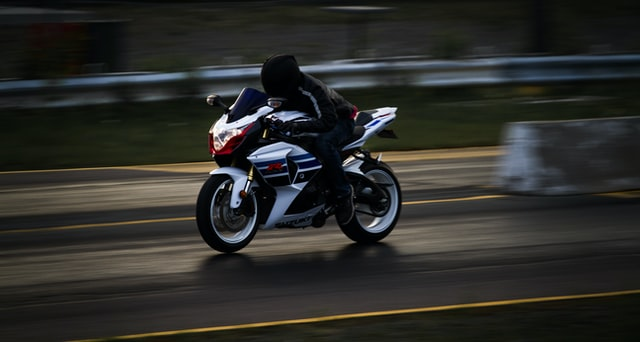

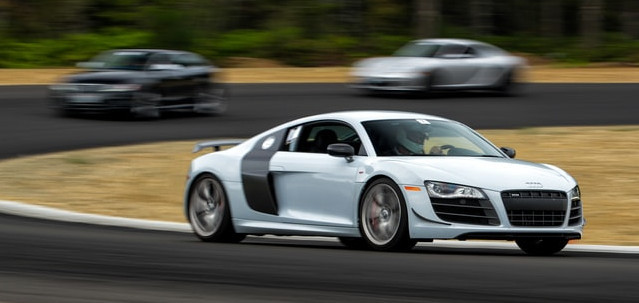

<p style="font-size:14px">
    Photos by William Daigneault and Christian Guirguis on Unplash
</p>

## Masquer la complexité

Toujours avec notre exemple de voiture et de moto, si je suis utilisateur du véhicule, j'ai juste besoin de savoir accélérer, freiner, changer de vitesse et de direction.

*Complexité vs Simplicité*
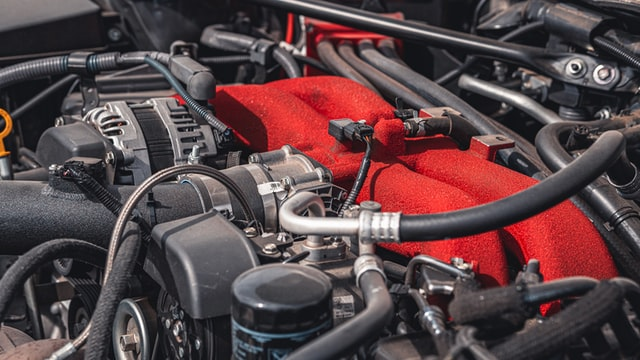

<p style="font-size:14px">
    Photo by Joshu Aragon on Unplash
</p>

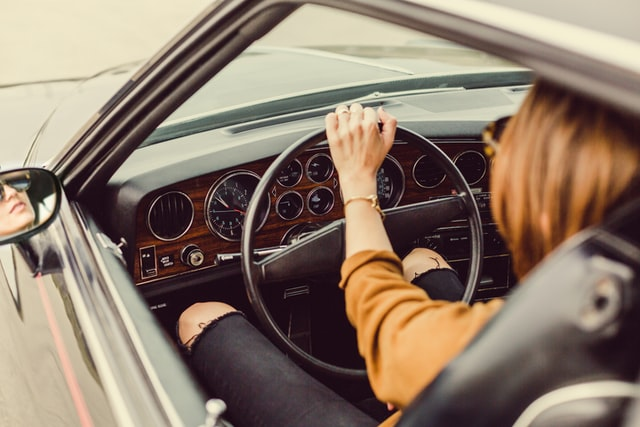

<p style="font-size:14px;">Photo by Matthew Henry on Unsplash</p>

## Réutiliser son code

Les voitures comme les motos ont toutes les deux :
- Un moteur et un réservoir d'essence
- Des roues
- Un accélérateur et au moins un frein
- ...

En POO on peut créer un objet `Véhicule` qui contiendra le code commun aux deux véhicules, lequel pourra être réutilisé par les objets `Voiture` et `Moto`.

## Faciliter les ajouts

Au début nous n'auront probablement qu'un seul modèle de voiture et de moto, mais ce n'est que temporaire !

*Deux voitures... légèrement différentes*

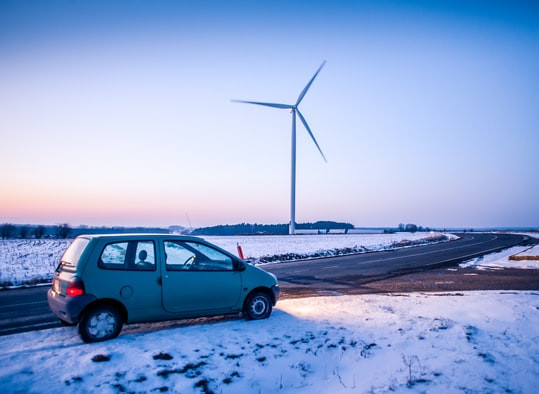

<p style="font-size:14px">
    Photos by Vincent Foret and Tim Carey on Unplash
</p>

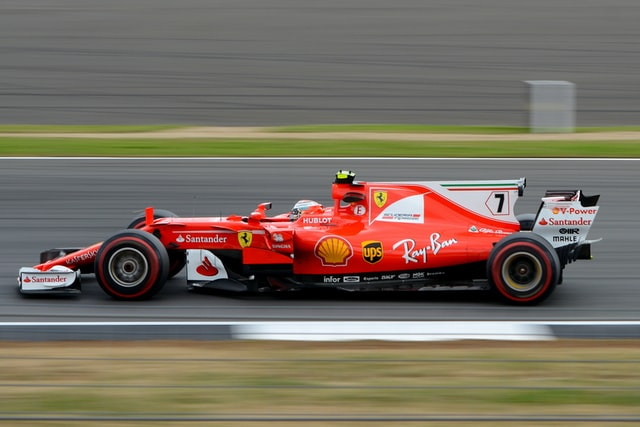

.

## Simplifier les interfaces

Lorsque l'on utilise exclusivement des modules et des fonctions, comme les fonctions n'ont aucune variable en commun, on est vite obligé de passer beaucoup, beaucoup, beaucoup __trop__ d'arguments !

*Ces dépendances d'interface sont semblables aux fils de fromage entre deux parts de pizza*

La POO permet d'avoir des variables internes à chaque objet (les attributs) qu'il n'est donc plus nécessaire de donner en argument aux fonctions de l'objet (les méthodes).

<p style="font-size:14px">
    Photo by Pablo Pacheco on Unplash
</p>

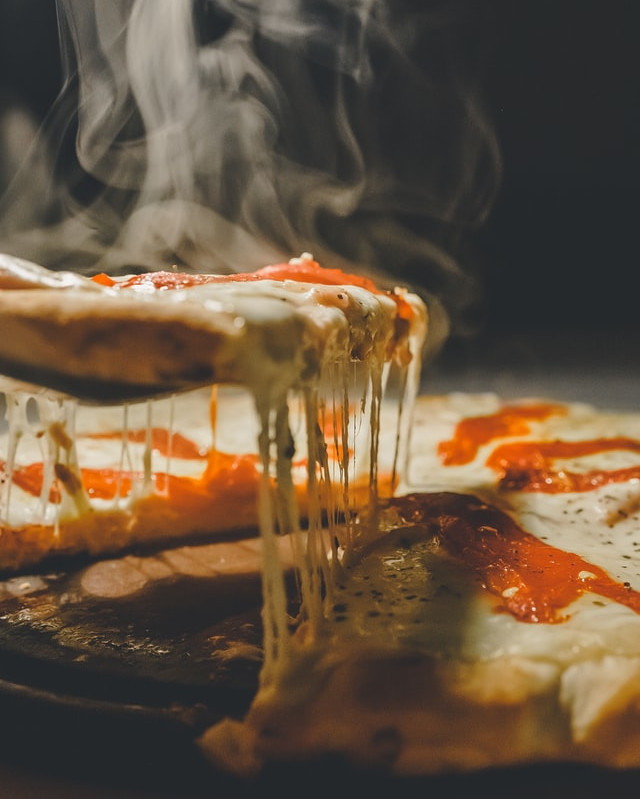

# Créez vos propres objets

In [1]:
class MonObjet:
    pass

objet = MonObjet()
print(objet)

## Méthodes

In [3]:
class MonObjet:
    
    def au_revoir(self):
        print("Au revoir !")
        
    def bonjour(self, prénom):
        print("Bonjour", prénom)
        
objet = MonObjet()
objet.bonjour("Pierre")
objet.au_revoir()

Bonjour Pierre
Au revoir !


## Attributs

In [4]:
class MonObjet:
    
    def __init__(self):
        self.compte = 0
        
    def compter(self):
        self.compte += 1
        print("compte:", self.compte)
        
objet_1 = MonObjet()
objet_1.compter()
objet_1.compter()

compte: 1
compte: 2


In [5]:
objet_2 = MonObjet()
objet_2.compter()

compte: 1


## Méthodes & Attributs de classe

In [6]:
class MonObjet:
    compte = 0
    
    @classmethod
    def compter(cls):
        cls.compte += 1
        print("compte de classe:", cls.compte)
        
    def autre_compter(self):
        self.compte += 1
        print("compte d'instance:", self.compte)

MonObjet.compter()
objet_1 = MonObjet()
objet_1.autre_compter()
objet_1.autre_compter()

compte de classe: 1
compte d'instance: 2
compte d'instance: 3


In [7]:
objet_2 = MonObjet()
objet_2.compte

1

## Properties & Setters

Parfois on veut avoir des attributs particuliers par exemple :
- calculés à la volée
- que l'on ne peut pas modifier
- qui déclenchent une action quand on les modifie

Pour cela on utilise des `properties` et `setters` en Python !

In [8]:
# Attribut que l'on ne peut pas modifier de l'extérieur

class Jouet:
    def __init__(self, prix):
        self._prix = prix

    @property
    def prix(self):
        return self._prix
    
jouet = Jouet(10)
jouet.prix

10

In [9]:
jouet.prix = 12

AttributeError: can't set attribute

In [15]:
# Attribut calculé à la volée

import time

class Chrono:
    def __init__(self):
        self._démarrage = time.time()
    
    @property
    def valeur(self):
        return time.time() - self._démarrage

chrono = Chrono()
chrono.valeur

0.0

In [17]:
chrono.valeur

5.126362562179565

In [18]:
# Déclencher une action à la modification

class Compte:
    def __init__(self, solde):
        self._solde = solde
        self._historique = [solde]
    
    # on empêche historique d'être modifiable
    @property
    def historique(self):
        return self._historique
    
    @property
    def solde(self):
        return self._solde
    
    # à chaque modification de solde, cette méthode est appelée
    @solde.setter
    def solde(self, nouveau_solde):
        self._solde = nouveau_solde
        self._historique.append(nouveau_solde)
        
compte = Compte(100)
compte.solde

100

In [21]:
compte.solde = 155
compte.historique

[100, 120, 130, 155]

# La POO est partout en python !

In [22]:
entier = 5
entier.__add__(5)

10

In [23]:
entier.__mul__(3)

15

In [24]:
flottant = -2.4
flottant.__abs__()

2.4

In [25]:
flottant.__int__()

-2

In [26]:
entier.to_bytes(2, "big")

b'\x00\x05'

In [27]:
flottant.hex()

'-0x1.3333333333333p+1'

In [28]:
liste = [1, 2, 3]
liste.append(4)
print(liste)
liste.pop()

[1, 2, 3, 4]


4

# La magie de l'héritage

L'héritage permet au développeur (nécessairement feignant) de faire deux choses essentielles :
- réutiliser des objets
- modifier le comportement d'objets sans modifier leur code

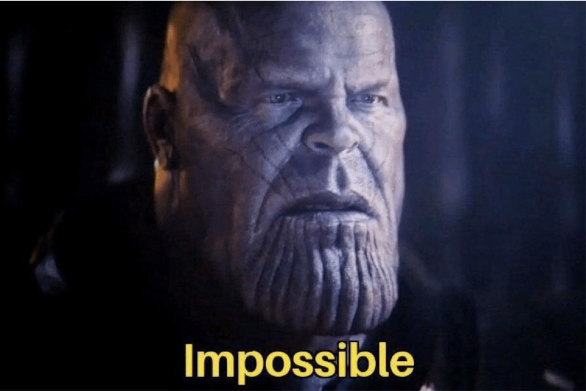

Et pourtant ça l'est !

Voyons un exemple :

In [29]:
class Voiture:
    def démarrer(self):
        print("Insérer la clé et la tourner ou appuyer sur le bouton de démarrage")
        
    def accélérer(self):
        print("Appuyer sur l'accélérateur et passer les vitesses si nécessaire")

class VoitureAutomatique(Voiture):
    def accélérer(self):
        print("Appuyer sur l'accélérateur")
        
class VoitureManuelle(Voiture):
    def __init__(self, max_rpm=6000):
        self.max_rpm = max_rpm
    
    def accélérer(self):
        print("Appuyer sur l'accélérateur,")
        print(f"à {self.max_rpm} tours par minute passer une vitesse.")
        
voiture_auto = VoitureAutomatique()
voiture_manu = VoitureManuelle()

In [30]:
voiture_auto.démarrer()
voiture_manu.démarrer()

Insérer la clé et la tourner ou appuyer sur le bouton de démarrage
Insérer la clé et la tourner ou appuyer sur le bouton de démarrage


In [31]:
voiture_auto.accélérer()

Appuyer sur l'accélérateur


In [32]:
voiture_manu.accélérer()

Appuyer sur l'accélérateur,
à 6000 tours par minute passer une vitesse.


# Un peu d'architecture

Qu'est-ce que l'architecture ? 

A quoi ça sert ?

<p style="font-size:50px; font-style:italic">
Une bonne architecture vise à réduire le coût du changement.
</p>

Notamment en évitant ça...

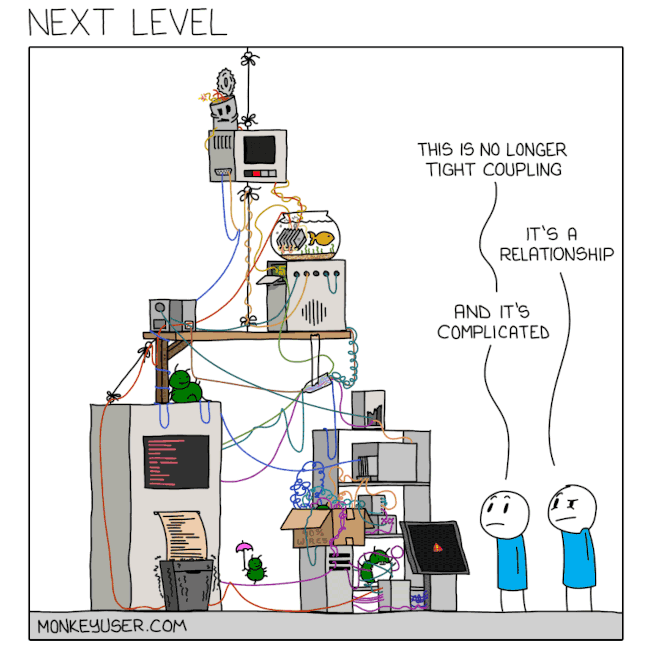

## Une classe, une responsabilité

Pour limiter le coût du changement, on veut limiter le nombre de lignes de codes modifiées par chaque changement.

Dans l'autre sens, on veut que la probabilité qu'une classe chanque lors d'un changement soit la plus faible possible, c'est à dire que l'on souhaite que __chaque classe ait le minimum de raisons possibles de changer__.

__Une seule responsabilité = Une seule raison de changer__

_Pourquoi pas zéro ?_

## Limiter l'interface publique

L'__interface publique__ est l'ensemble des méthodes et attributs qui sont _utilisables à l'extérieur_ de la classe, donc par tout le reste du code.

L'__interface privée__ correspond aux méthodes et attributs qui ne doivent êtres _accessibles que depuis l'intérieur_ de la classe.

Que se passe-t-il si l'on modifie l'interface publique ?

_On doit modifier tous les endroits du code où cette interface est appelée..._

D'où l'intérêt de limiter au maximum la _surface_ de cette interface (le nombre de méthodes et d'attributs qui la composent).

En python, il n'est pas possible de _complètement_ empêcher l'accès à des attributs ou méthodes d'une classe, on utilise donc une convention pour séparer l'interface publique de l'interface privée.

_Tous les attributs et méthodes de l'interface privée sont précédés d'un underscore_ `_`

In [33]:
class Article:
    def __init__(self):
        # attributs publics
        self.poids
        self.prix
        
        #attributs privés
        self._référence
        self._marge
    
    # méthode publique
    def acheter(self):
        if self._vérifier_stock():
            print("Ajouté au panier")
        else:
            print("Article indisponible")
    
    # méthode privée
    def _vérifier_stock(self):
        # TODO: utiliser la référence pour vérifier le stock
        pass

## Préférer l'extension à la modification

_L'extension ?_

L'extension fait référence à la modification de fonctionnalité par héritage (plutôt que d'ajouter ou de modifier directement du code dans une classe).

Quel est l'intérêt ?

_Lorsqu'une classe a été testée et son fonctionnement validé, toute modification du code risque d'introduire des bugs et donc ralentir le développement._

_Ajouter du code dans une classe risque de la faire grossir outre mesure (en général on se limite à 200-300 lignes) et de lui faire endosser plusieurs responsabilités (cf. 6.1), la rendant ensuite coûteuse à maintenir._

In [34]:
class Fonction:
    def __init__(self, coefs):
        self.coefs = coefs
        
    @property
    def équation(self):
        monomes = []
        for degré, coef in enumerate(self.coefs):
            monomes.append(f"{coef}X^{degré}")
        return " + ".join(monomes)
    
    def évaluer(self, x):
        résultat = 0
        for degré, coef in enumerate(self.coefs):
            résultat += coef * (x ** degré)
        return résultat
            
ma_fonction = Fonction([1, 2, 4])
ma_fonction.équation

'1X^0 + 2X^1 + 4X^2'

In [35]:
ma_fonction.évaluer(5)

111

-20X^0 + -15X^1 + 1X^2 + 1X^3


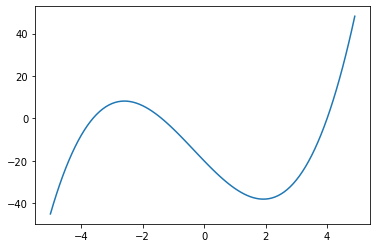

In [36]:
from matplotlib import pyplot as plt

class FonctionAffichable(Fonction):
    def plot(self):
        x_coords = [-5 + 0.1 * x for x in range(100)]
        y_coords = [self.évaluer(x) for x in x_coords]
        plt.plot(x_coords, y_coords)

fonction = FonctionAffichable([-20, -15, 1, 1])
print(fonction.équation)
fonction.plot()

_On note ici que le fait d'étendre la classe par héritage plutôt que de rajouter la fonction `plot()` dans la première classe permet aussi de faire en sorte que chaque classe ait une seule responsabilité_ :

- `Fonction` est responsable du calcul
- `FonctionAffichable` est responsable de l'affichage

Ainsi `Fonction` ne sera modifiée que si l'on veut changer la manière dont on calcule, et `FonctionAffichable` ne sera modifiée que si l'on veut changer l'affichage.

## Garantir le principe de substitution de Liskov

_L'autre intérêt d'étendre les classes plutôt que de les modifier lorsque l'on fait de l'héritage, est que si un code qui fonctionnait avec une classe en particulier utilise un enfant de cette classe (`FonctionAffichable` est un enfant de `Fonction`), alors il continue à fonctionner sans qu'une modification soit nécessaire._

Cette propriété est très utile pour garantir que l'extension d'une classe par héritage ne casse pas du code existant en dehors de cette classe.

Tout comme avec l'interface publique, l'objectif est de limiter l'impact qu'une modification locale du code peut avoir sur le reste du code (qui peut parfois contenir plusieurs dizaines de milliers voire millions de lignes).